In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [3]:
def add_border(array, new_height=240, new_width=240, border_value=0):
    # Get the dimensions of the original array
    original_height, original_width = array.shape

    # Calculate the amount of border to add on each side
    top_border = (new_height - original_height) // 2
    bottom_border = new_height - original_height - top_border
    left_border = (new_width - original_width) // 2
    right_border = new_width - original_width - left_border

    # Create a new array with the desired size, filled with the border value
    new_array = np.full((new_height, new_width), border_value, dtype=array.dtype)

    # Copy the original array into the center of the new array
    new_array[top_border:top_border + original_height, left_border:left_border + original_width] = array

    return new_array


In [4]:
file_path = '/content/drive/MyDrive/Bachelor-degree/Progetto ML/Data/data_full'

#Read the files


In [5]:
import os
import nibabel as nb

# Set the working directory to the specified folder
os.chdir(file_path)

# List the files in the folder
image_files = os.listdir()
image_files.sort()

good_paths = image_files[:576]
blurred_paths = image_files[576:]

print(image_files)
print(len(good_paths), len(blurred_paths))


['img_0.nii.gz', 'img_1.nii.gz', 'img_10.nii.gz', 'img_100.nii.gz', 'img_101.nii.gz', 'img_102.nii.gz', 'img_103.nii.gz', 'img_104.nii.gz', 'img_105.nii.gz', 'img_106.nii.gz', 'img_107.nii.gz', 'img_108.nii.gz', 'img_109.nii.gz', 'img_11.nii.gz', 'img_110.nii.gz', 'img_111.nii.gz', 'img_112.nii.gz', 'img_113.nii.gz', 'img_114.nii.gz', 'img_115.nii.gz', 'img_116.nii.gz', 'img_117.nii.gz', 'img_118.nii.gz', 'img_119.nii.gz', 'img_12.nii.gz', 'img_120.nii.gz', 'img_121.nii.gz', 'img_122.nii.gz', 'img_123.nii.gz', 'img_124.nii.gz', 'img_125.nii.gz', 'img_126.nii.gz', 'img_127.nii.gz', 'img_128.nii.gz', 'img_129.nii.gz', 'img_13.nii.gz', 'img_130.nii.gz', 'img_131.nii.gz', 'img_132.nii.gz', 'img_133.nii.gz', 'img_134.nii.gz', 'img_135.nii.gz', 'img_136.nii.gz', 'img_137.nii.gz', 'img_138.nii.gz', 'img_139.nii.gz', 'img_14.nii.gz', 'img_140.nii.gz', 'img_141.nii.gz', 'img_142.nii.gz', 'img_143.nii.gz', 'img_144.nii.gz', 'img_145.nii.gz', 'img_146.nii.gz', 'img_147.nii.gz', 'img_148.nii.gz', 

In [6]:
# Image normalization

def normalize_image(image):
    min_value = np.min(image)
    max_value = np.max(image)
    normalized_image = (image - min_value) / (max_value - min_value)
    return normalized_image


In [7]:
import nibabel as nb

# Initialize empty lists to store images as numpy arrays
images1x = []
images2x = []
images1_total = []
images2_total = []

# Load the images into lists as numpy arrays
for i in range(len(good_paths[:])):

    image_path1 = good_paths[i]
    image_path2 = blurred_paths[i]

    img1 = nb.load(image_path1).get_fdata()
    img2 = nb.load(image_path2).get_fdata()

    print(img1.shape, img2.shape, "Image number:", i + 1)

    slice1_x = img1[img1.shape[0] // 2, :240, :240]
    slice2_x = img2[img2.shape[0] // 2, :240, :240]

    slice1_y = img1[:240, img1.shape[0] // 2, :240]
    slice2_y = img2[:240, img2.shape[0] // 2, :240]

    slice1_z = img1[:240, :240, img1.shape[0] // 2]
    slice2_z = img2[:240, :240, img2.shape[0] // 2]

    slice1_y = add_border(slice1_y)
    slice2_y = add_border(slice2_y)
    slice1_z = add_border(slice1_z)
    slice2_z = add_border(slice2_z)

    # Convert the image to a numpy array
    img1x_np = np.array(slice1_x)
    img2x_np = np.array(slice2_x)

    img1y_np = np.array(slice1_y)
    img2y_np = np.array(slice2_y)

    img1z_np = np.array(slice1_z)
    img2z_np = np.array(slice2_z)

    # Add the image to the list
    images1x.append(img1x_np)
    images2x.append(img2x_np)

    images1_total.extend([img1x_np, img1y_np, img1z_np])
    images2_total.extend([img2x_np, img2y_np, img2z_np])

    # Normalize the total images
    images1_total = [normalize_image(img) for img in images1_total]
    images2_total = [normalize_image(img) for img in images2_total]

# Create tensors containing all images
X_data = np.asarray(images2x)
Y_data = np.asarray(images1x)

Xtot_data = np.asarray(images2_total).reshape(-1, 3, 240, 240)
Ytot_data = np.asarray(images1_total).reshape(-1, 3, 240, 240)

# Print the shape of the resulting tensors
print("\n", "Shape of image tensors:", X_data.shape, Y_data.shape)
print("Shape of total image tensors:", Xtot_data.shape, Ytot_data.shape)


(180, 240, 241) (180, 240, 241) Image number: 1
(181, 241, 240) (181, 241, 240) Image number: 2
(168, 240, 240) (168, 240, 240) Image number: 3
(181, 240, 240) (181, 240, 240) Image number: 4
(181, 240, 240) (181, 240, 240) Image number: 5
(180, 240, 240) (180, 240, 240) Image number: 6
(180, 241, 240) (180, 241, 240) Image number: 7
(180, 241, 241) (180, 241, 241) Image number: 8
(181, 240, 241) (181, 240, 241) Image number: 9
(180, 240, 240) (180, 240, 240) Image number: 10
(181, 240, 241) (181, 240, 241) Image number: 11
(180, 240, 240) (180, 240, 240) Image number: 12
(180, 240, 240) (180, 240, 240) Image number: 13
(156, 241, 241) (156, 241, 241) Image number: 14
(181, 241, 241) (181, 241, 241) Image number: 15
(181, 240, 240) (181, 240, 240) Image number: 16
(180, 240, 240) (180, 240, 240) Image number: 17
(180, 240, 240) (180, 240, 240) Image number: 18
(180, 240, 240) (180, 240, 240) Image number: 19
(181, 241, 240) (181, 241, 240) Image number: 20
(180, 241, 241) (180, 241, 24

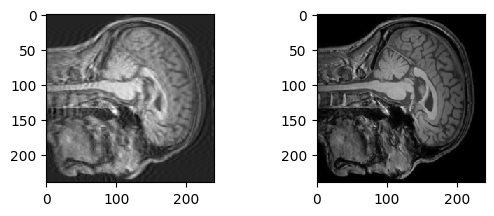

In [8]:
plt.subplot(2,2,1)
plt.imshow(X_data[1,:,:], cmap = "gray", interpolation = "none")
plt.subplot(2,2,2)
plt.imshow(Y_data[1,:,:], cmap = "gray", interpolation = "none")

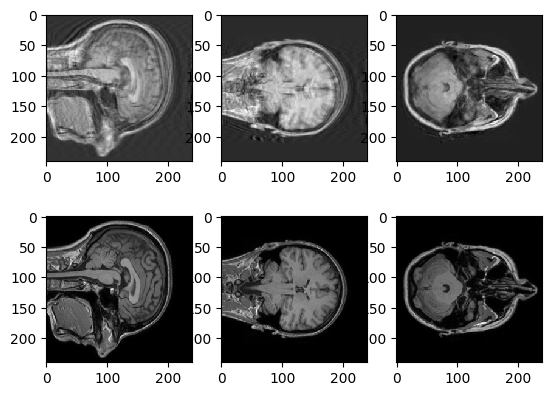

In [9]:
plt.subplot(2,3,1)
plt.imshow(Xtot_data[0, 0,:,:], cmap = "gray", interpolation = "none")
plt.subplot(2,3,4)
plt.imshow(Ytot_data[0, 0,:,:], cmap = "gray", interpolation = "none")

plt.subplot(2,3,2)
plt.imshow(Xtot_data[0, 1,:,:], cmap = "gray", interpolation = "none")
plt.subplot(2,3,5)
plt.imshow(Ytot_data[0, 1,:,:], cmap = "gray", interpolation = "none")

plt.subplot(2,3,3)
plt.imshow(Xtot_data[0, 2,:,:], cmap = "gray", interpolation = "none")
plt.subplot(2,3,6)
plt.imshow(Ytot_data[0, 2,:,:], cmap = "gray", interpolation = "none")

#Dataset Preparation, single image


In [10]:
# Splitting the dataset into training and test sets (80:20)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True, random_state=12345)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(460, 240, 240)
(460, 240, 240)
(116, 240, 240)
(116, 240, 240)


In [11]:
# Check if GPU is available and which type of GPU is present
if torch.cuda.is_available():
    print('Number of available GPUs:', torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print(torch.cuda.get_device_name(i))

# Set device to 'cuda' if GPU is available, otherwise 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Computation device: {device}\n")


Number of available GPUs: 1
Tesla T4
Computation device: cuda



In [12]:
# Conversion of numpy arrays to PyTorch tensors

W = 240
H = 240

X_train_pt = torch.Tensor(X_train.reshape(-1, 1, W, H)).float()
Y_train_pt = torch.Tensor(Y_train).float()
X_test_pt = torch.Tensor(X_test.reshape(-1, 1, W, H)).float()
Y_test_pt = torch.Tensor(Y_test).float()

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)


torch.Size([460, 1, 240, 240])
torch.Size([460, 240, 240])
torch.Size([116, 1, 240, 240])
torch.Size([116, 240, 240])


In [13]:
# Divide into batches
from torch.utils.data import TensorDataset, DataLoader

batch = 1

dataset_train = TensorDataset(X_train_pt, Y_train_pt)
train_dl = DataLoader(dataset_train, batch_size=batch, shuffle=True, num_workers=1, drop_last=True)

dataset_test = TensorDataset(X_test_pt, Y_test_pt)
test_dl = DataLoader(dataset_test, batch_size=batch, shuffle=True, num_workers=1, drop_last=True)


Feature batch shape: torch.Size([1, 1, 240, 240])
Labels batch shape: torch.Size([1, 240, 240])
Feature:


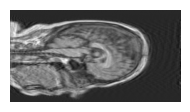

Label: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [14]:
feat, label = next(iter(train_dl))

print(f"Feature batch shape: {feat.size()}")
print(f"Labels batch shape: {label.size()}")

an_event = feat[0].view((W,H))
a_label = label[0]

figure = plt.figure(figsize=(2.2, 1.2))
print(f"Feature:")
plt.imshow(an_event, aspect = "auto", cmap = "gray")
plt.axis("off")
plt.show()
print(f"Label: {a_label}")

#CNN single image implementation

In [15]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        def BNReLuConv(in_channels, out_channels, kernel_size, stride=1, padding=1, dilation=1):
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation, bias=False)
            relu = nn.ReLU()

            return nn.Sequential(relu, conv)

        def Conv2DBNReLU(in_channels, out_channels, kernel_size, stride=1, padding=1, dilation=1):
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation, bias=False)
            relu = nn.ReLU()

            return nn.Sequential(conv, relu)


        self.conv1 = Conv2DBNReLU(1, 16, kernel_size=3, stride=1)
        self.conv2 = BNReLuConv(16, 16, kernel_size=3, stride=1)
        self.conv3 = BNReLuConv(16, 16, kernel_size=3, stride=1)
        self.conv4 = BNReLuConv(16, 32, kernel_size=2, stride=1, dilation=2)
        self.conv5 = BNReLuConv(32, 32, kernel_size=3, stride=1)
        self.conv6 = BNReLuConv(32, 64, kernel_size=2, stride=1, dilation=4, padding = 2)
        self.conv7 = BNReLuConv(64, 64, kernel_size=3, stride=1)
        self.conv8 = BNReLuConv(64, 80, kernel_size=3, stride=1)
        self.conv9 = BNReLuConv(80, 1, kernel_size=3, stride=1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):

        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)

        x5 = self.conv5(x4) + x4 #skip connection
        x6 = self.conv6(x5)
        x7 = self.conv7(x6) + x6 #skip connection
        x8 = self.conv8(x7)

        output = self.conv9(x8) + x  #skip connection

        return output

In [16]:
# printout of the model

model = CNN()
print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,W,H))
else:
  summary(model, input_size=(1,W,H))

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): ReLU()
    (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (conv3): Sequential(
    (0): ReLU()
    (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (conv4): Sequential(
    (0): ReLU()
    (1): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1), dilation=(2, 2), bias=False)
  )
  (conv5): Sequential(
    (0): ReLU()
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (conv6): Sequential(
    (0): ReLU()
    (1): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2), dilation=(4, 4), bias=False)
  )
  (conv7): Sequential(
    (0): ReLU()
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (conv8): Sequential(
    (0): ReLU()
    (1): Conv

In [17]:
feat, label = next(iter(train_dl))

feat = feat.to(device)
label = label.to(device)

model.to(device)

out = model(feat)

print('Neural network input:', feat.shape)
print('Neural network output:', out.shape)
print(out[0])


Neural network input: torch.Size([1, 1, 240, 240])
Neural network output: torch.Size([1, 1, 240, 240])
tensor([[[-0.1924, -0.0759,  0.5019,  ...,  0.0522,  0.1259, -0.1974],
         [-0.5298, -0.2837,  1.2945,  ...,  0.3541,  0.3623, -0.6346],
         [-0.8555, -0.7127,  2.0602,  ...,  0.5733,  0.6107, -1.1912],
         ...,
         [-0.6561, -0.0700,  0.4158,  ..., -0.8849, -1.7159, -1.9044],
         [-1.7887, -1.0858, -0.2227,  ..., -0.1876, -1.5647, -2.1252],
         [-2.2640, -1.0543,  0.1542,  ..., -0.5107, -2.0616, -2.7468]]],
       device='cuda:0', grad_fn=<SelectBackward0>)


In [18]:
# Loss function
loss_func = torch.nn.L1Loss()

# Metric: Root Mean Squared Error (RMSE)
def RMSELoss(yhat, y):
    return torch.sqrt(torch.mean((yhat - y) ** 2))

metric_func = RMSELoss

import torch
from scipy.stats import pearsonr

def calculate_pcc(predictions, labels):
    predictions = predictions.flatten().detach().cpu().numpy()
    labels = labels.flatten().detach().cpu().numpy()
    pcc, _ = pearsonr(predictions, labels)
    return pcc

# Optimizer: using Adam
from torch import optim
LR_ST = 1e-4
opt = optim.Adam(model.parameters(), lr=LR_ST)


In [19]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')):
        self.best_valid_loss = best_valid_loss

    def __call__(self, current_valid_loss, epoch, model):
        self.best_valid_loss = current_valid_loss

        print(f"\nBest validation loss: {self.best_valid_loss}")
        print(f"\nSaving best model for epoch: {epoch + 1}\n")

        torch.save({
            'model': model,
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
        }, 'single_image_model.pt')


In [20]:
#Training
import time

save_model=SaveBestModel()
model=CNN()
opt = optim.Adam(model.parameters(), lr=LR_ST)
model=model.to(device)

epochs = 500

hist_loss = []
hist_metric = []

start_t=time.time()

for epoch in range(epochs):
  t0=time.time()

  # training
  model.train()
  train_loss=0
  train_metric = 0
  counter=0
  for xb, yb in train_dl:
    counter += 1
    xb=xb.to(device)
    yb=yb.to(device)

    pred=model(xb)
    loss=loss_func(pred.view(1,W,H), yb)
    metric = metric_func(pred.view(1,W,H),yb)
    train_loss+=loss.item()
    train_metric += metric.item()
    loss.backward()
    opt.step()
    opt.zero_grad()

  train_loss /=counter
  train_metric /= (counter)
  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  elapsed_time = time.time()-t0
  print("epoch: %d, time [s]: %.4f, train loss: %.6f, train metric: %.6f"  %(epoch+1, elapsed_time, train_loss,train_metric))

save_model(hist_loss[-1], epoch, model)



epoch: 1, time [s]: 7.3080, train loss: 67.611147, train metric: 118.528986
epoch: 2, time [s]: 6.6412, train loss: 63.256307, train metric: 113.699120
epoch: 3, time [s]: 6.6587, train loss: 61.998219, train metric: 112.485942
epoch: 4, time [s]: 6.7119, train loss: 61.219048, train metric: 111.476261
epoch: 5, time [s]: 6.7287, train loss: 60.848332, train metric: 110.934460
epoch: 6, time [s]: 6.8142, train loss: 60.368926, train metric: 110.403977
epoch: 7, time [s]: 6.8232, train loss: 60.209870, train metric: 109.971386
epoch: 8, time [s]: 6.9249, train loss: 59.937443, train metric: 109.600072
epoch: 9, time [s]: 6.9177, train loss: 59.708486, train metric: 109.291599
epoch: 10, time [s]: 7.0059, train loss: 59.538568, train metric: 109.141860
epoch: 11, time [s]: 7.0373, train loss: 59.307417, train metric: 108.757461
epoch: 12, time [s]: 7.1393, train loss: 59.112071, train metric: 108.510270
epoch: 13, time [s]: 7.2076, train loss: 58.952459, train metric: 108.227041
epoch: 1

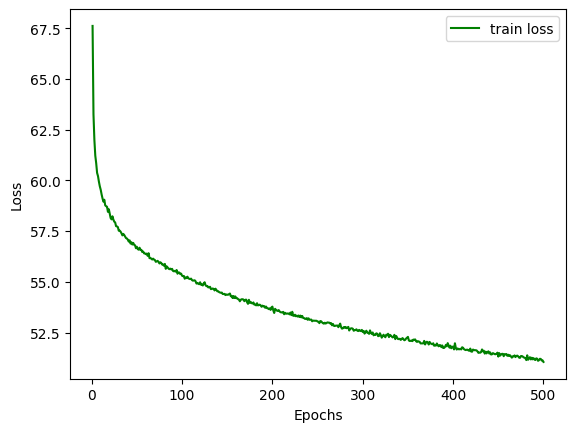

In [21]:
# training loss plot
plt.plot(range(1,len(hist_loss)+1), hist_loss, color='green', linestyle='-', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Neural network input: torch.Size([1, 1, 240, 240])
Neural network output: torch.Size([1, 1, 240, 240])
Feature:


(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

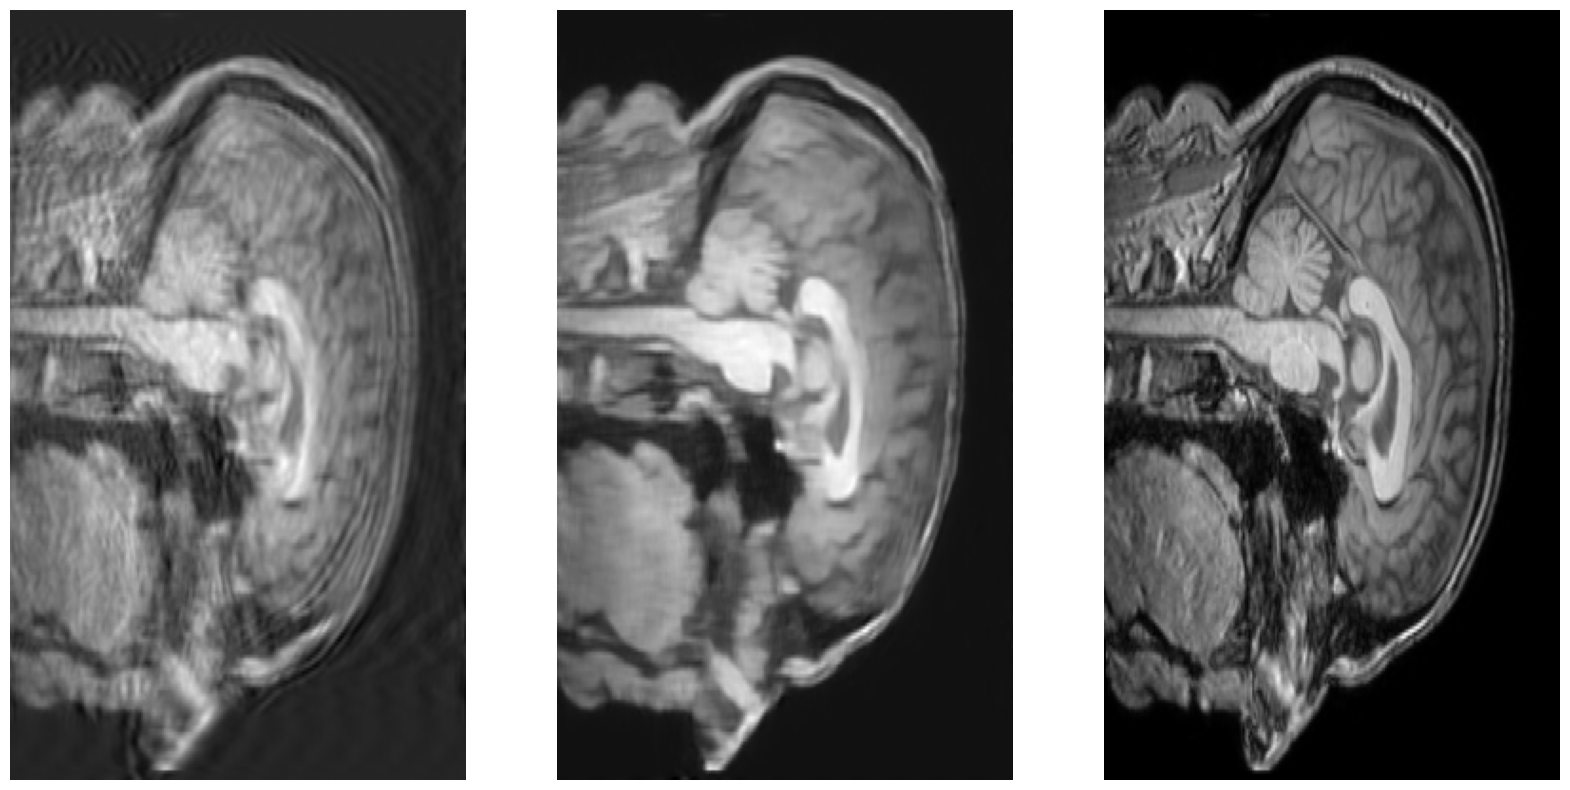

In [24]:
# Visualize cleaned images

model.eval()

feat, label = next(iter(test_dl))

feat = feat.to(device)
label = label.to(device)

model.to(device)

out = model(feat)

print('Neural network input:', feat.shape)
print('Neural network output:', out.shape)

figure = plt.figure(figsize=(20, 10))
print("Feature:")

plt.subplot(1, 3, 1)
plt.imshow(feat.detach().cpu().numpy().reshape(240, 240), aspect="auto", cmap="gray", label="feat")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(out.detach().cpu().numpy().reshape(240, 240), aspect="auto", cmap="gray", label="out")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(label.detach().cpu().numpy().reshape(240, 240), aspect="auto", cmap="gray", label="label")
plt.axis("off")


In [25]:
# Test set performance evaluation

def RMSELoss(yhat, y):
    return torch.sqrt(torch.mean((yhat - y) ** 2))

loss_func = RMSELoss
model.to(device)

total_loss = 0
total_pcc_cleaned = 0
total_pcc_noisy = 0
total_loss_noisy = 0
counter = 0

for xb, yb in test_dl:
    counter += 1
    xb = xb.to(device)
    yb = yb.to(device)
    pred = model(xb)
    total_pcc_cleaned += calculate_pcc(pred, yb).item()
    total_pcc_noisy += calculate_pcc(xb, yb).item()
    total_loss += loss_func(pred, yb).item()
    total_loss_noisy += loss_func(xb, yb).item()

avg_loss = total_loss / counter
avg_loss_noisy = total_loss_noisy / counter
avg_pcc_cleaned = total_pcc_cleaned / counter
avg_pcc_noisy = total_pcc_noisy / counter

print("PCC cleaned images:", avg_pcc_cleaned, "PCC noisy images:", avg_pcc_noisy)
print('Test loss:', avg_loss, "Loss noisy images:", avg_loss_noisy)


PCC cleaned images: 0.9555569034198235 PCC noisy images: 0.937322931043033
Test loss: 105.42178650560051 Loss noisy images: 131.45355102933686
